In [19]:
#package seaborn has used for data visualization, pandas, numpy for data processing and manuipulations.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

In [20]:
nobel = pd.read_csv("F:/DATA SCIENCE/DATA/archive.csv",parse_dates=True)

In [21]:
nobel.head(n=2)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France


In [22]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              940 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null object
Death City              599 non-null object
Death Country           605 non-null object
dtypes: int64(2), object(16)
memory usage: 75.7+ KB


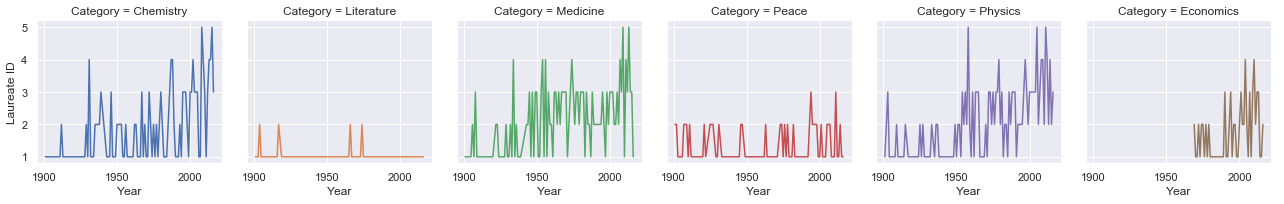

In [23]:
#Nobel Prizes by Category from 1901 to 2016
year_cat=nobel.groupby(['Year','Category'])['Laureate ID'].count().reset_index()
year_cat
g = sns.FacetGrid(year_cat, col='Category', hue='Category')
g = g.map(plt.plot, 'Year', 'Laureate ID')

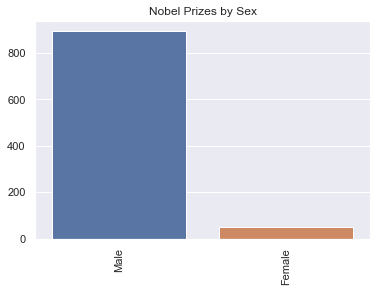

In [24]:
#  In this section plotting the nobel prize by sex, country and category
sex=nobel['Sex'].value_counts()
sns.barplot(x=sex.index,y=sex.values)
plt.xticks(rotation=90)
plt.title('Nobel Prizes by Sex')
plt.show()

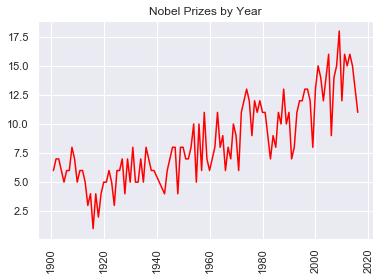

In [25]:
#Trend in Nobel Prize
year=nobel['Year'].value_counts()

sns.lineplot(x=year.index,y=year.values,color='red')

plt.xticks(rotation=90)
plt.title('Nobel Prizes by Year')
plt.show()

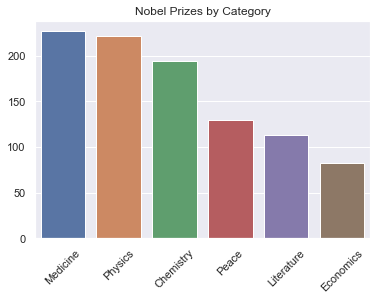

In [26]:
#Categorywise - Number of Nobel Prizes
cat= nobel['Category'].value_counts()
sns.barplot(x=cat.index,y=cat.values)
plt.xticks(rotation=45)
plt.title('Nobel Prizes by Category')
plt.show()

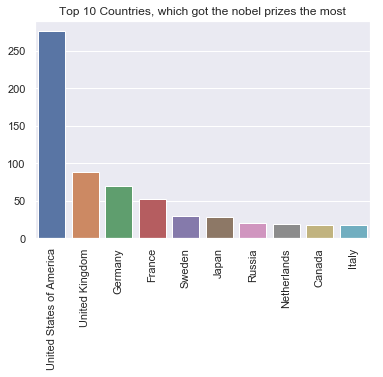

In [27]:
#Countrywise - Which Country got the most
ctry=nobel['Birth Country'].value_counts().head(10)
sns.barplot(x=ctry.index,y=ctry.values)
plt.xticks(rotation=90)
plt.title('Top 10 Countries, which got the nobel prizes the most')
plt.show()

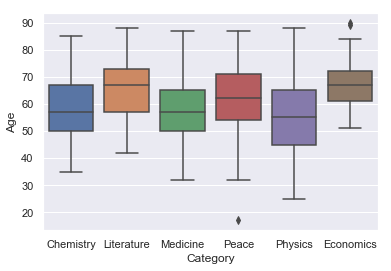

In [28]:
#Distribution of Age of Winners
nobel['Birth Year'] = nobel['Birth Date'].str[0:4] #first four no. of birth date
nobel['Birth Year'] = nobel['Birth Year'].apply(pd.to_numeric) #converting argument to numeric
nobel['Age']=nobel['Year']- nobel['Birth Year']
sns.boxplot(data=nobel,
         x='Category',
         y='Age')

plt.show()



In [29]:
#Oldest Nobel Prize Winner
old=nobel.nlargest(5,'Age')
display(old[['Category','Full Name','Birth Country','Sex','Age']])

,Category,Full Name,Birth Country,Sex,Age
825,Economics,Leonid Hurwicz,Russia,Male,90.0
904,Economics,Lloyd S. Shapley,United States of America,Male,89.0
770,Physics,Raymond Davis Jr.,United States of America,Male,88.0
828,Literature,Doris Lessing,Persia (Iran),Female,88.0
390,Medicine,Peyton Rous,United States of America,Male,87.0


In [30]:
#Youngest Nobel Prize Winner
young=nobel.nsmallest(5,'Age')
display(young[['Category','Full Name','Birth Country','Sex','Age']])

,Category,Full Name,Birth Country,Sex,Age
940,Peace,Malala Yousafzai,Pakistan,Female,17.0
86,Physics,William Lawrence Bragg,Australia,Male,25.0
169,Physics,Werner Karl Heisenberg,Germany,Male,31.0
174,Physics,Paul Adrien Maurice Dirac,United Kingdom,Male,31.0
194,Physics,Carl David Anderson,United States of America,Male,31.0


In [31]:
# life span calculation
nobel['D Year'] = nobel['Death Date'].str[0:4]
nobel['D Year'] = nobel['D Year'].replace(to_replace="nan", value=0)
nobel['D Year'] = nobel['D Year'].apply(pd.to_numeric)
nobel['lifespan']=nobel['D Year']- nobel['Birth Year']

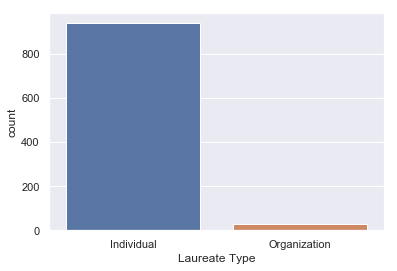

In [32]:
#Laureate Types
sns.countplot(nobel['Laureate Type'])
plt.show()

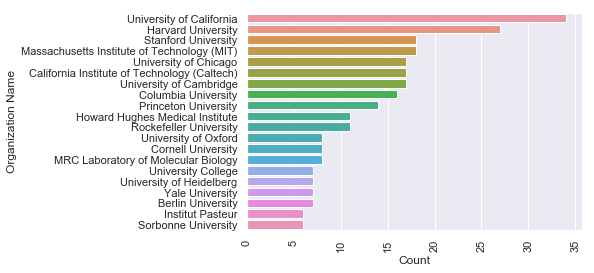

In [33]:
#Organization Toppers
#Plotting the top organization , which won the nobel prize the most.

org = nobel['Organization Name'].value_counts().reset_index().head(20)

sns.barplot(x='Organization Name',y='index',data=org)
plt.xticks(rotation=90)
plt.ylabel('Organization Name')
plt.xlabel('Count')
plt.show()